In [33]:
import random
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

In [70]:
# Constants
nA = 6.023e23
vol = 1e-15

# Initial Value - Concentration-based Data
y = np.array([5e-7, 2e-7, 0, 0])
k = np.array([1e6, 1e-4, 1e-1])

# Reactions
v = np.array([
    [-1, -1, 1, 0], 
    [1, 1, -1, 0], 
    [0, 1, -1, 1]
])

##  Stochastic Simulation Algorithm SSA

In [71]:
def SSA(y, k, v):
    global nA, vol
    
    # Molecular-based Data
    x = y * (nA * vol) // 1
    c = np.array([k[0] / (nA * vol), k[1], k[2]])

    # Time Limit
    t_max = 50
    t = 0
    t_list = [0]

    a = np.zeros(3)
    result = [x]
    while t < t_max:
        # Propensity Function
        a[0] = c[0] * x[0] * x[1]
        a[1] = c[1] * x[2]
        a[2] = c[2] * x[2]
        a_sum = sum(a)
        
        # Next Reaction Index
        r1 = random.random()    
        a_sum1 = 0
        for j in range(3):
            a_sum1 += a[j]
            if a_sum1 / a_sum > r1:
                break
        x = x + v[j]
        result.append(x)
        
        # Time until next reaction
        r2 = random.random()
        tau = np.log(1 / r2) / a_sum
        t += tau
        t_list.append(t)
        
        # print(x, a, t)
    
    return(t_list, result)

t_list, result = SSA(y, k, v)

In [58]:
result

[array([301., 120.,   0.,   0.]),
 array([300., 119.,   1.,   0.]),
 array([299., 118.,   2.,   0.]),
 array([298., 117.,   3.,   0.]),
 array([297., 116.,   4.,   0.]),
 array([296., 115.,   5.,   0.]),
 array([295., 114.,   6.,   0.]),
 array([294., 113.,   7.,   0.]),
 array([293., 112.,   8.,   0.]),
 array([292., 111.,   9.,   0.]),
 array([291., 110.,  10.,   0.]),
 array([290., 109.,  11.,   0.]),
 array([289., 108.,  12.,   0.]),
 array([288., 107.,  13.,   0.]),
 array([287., 106.,  14.,   0.]),
 array([287., 107.,  13.,   1.]),
 array([286., 106.,  14.,   1.]),
 array([285., 105.,  15.,   1.]),
 array([284., 104.,  16.,   1.]),
 array([283., 103.,  17.,   1.]),
 array([282., 102.,  18.,   1.]),
 array([281., 101.,  19.,   1.]),
 array([280., 100.,  20.,   1.]),
 array([279.,  99.,  21.,   1.]),
 array([278.,  98.,  22.,   1.]),
 array([277.,  97.,  23.,   1.]),
 array([276.,  96.,  24.,   1.]),
 array([275.,  95.,  25.,   1.]),
 array([274.,  94.,  26.,   1.]),
 array([273., 

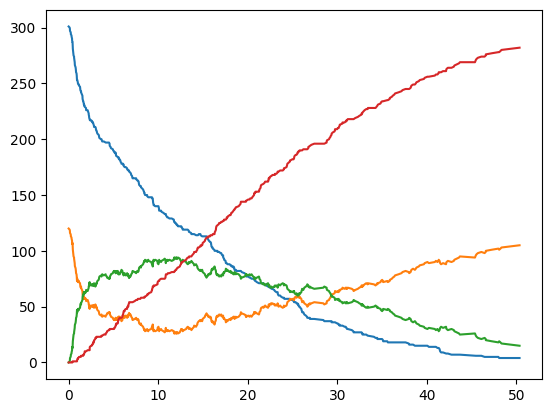

In [59]:
plt.plot(t_list, result)
plt.show()

## Tau-Leaping / CLE

In [122]:
def CLE(y, k, v):
    global nA, vol

    # Molecular-based Data
    x = y * (nA * vol) // 1
    c = np.array([k[0] / (nA * vol), k[1], k[2]])

    # Tau-Leaping with L Steps
    t = 0
    L = 250
    t_max = 50
    tau = t_max / L
    t_list = np.arange(t, t_max + tau, tau)

    a = np.zeros(3)
    result = [x]
    for i in range(250): 
        a[0] = c[0] * x[0] * x[1]
        a[1] = c[1] * x[2]
        a[2] = c[2] * x[2]
        for j in range(3):
            if a[j] < 0: 
                a[j] = 0
        
        # Number of reactions during each step
        d = np.array([
            np.random.poisson(a[j] * tau, 1)[0] for j in range(3)
        ])
        
        x = x + np.dot(d, v)
        result.append(x)
        
        # print(x, a, d)
    
    return(t_list, result)

t_list, result = CLE(y, k, v)

In [61]:
result

[array([301., 120.,   0.,   0.]),
 array([294., 113.,   7.,   0.]),
 array([285., 104.,  16.,   0.]),
 array([274.,  93.,  27.,   0.]),
 array([266.,  85.,  35.,   0.]),
 array([262.,  81.,  39.,   0.]),
 array([252.,  72.,  48.,   1.]),
 array([244.,  64.,  56.,   1.]),
 array([236.,  57.,  63.,   2.]),
 array([227.,  48.,  72.,   2.]),
 array([223.,  46.,  74.,   4.]),
 array([220.,  46.,  74.,   7.]),
 array([220.,  49.,  71.,  10.]),
 array([217.,  46.,  74.,  10.]),
 array([213.,  42.,  78.,  10.]),
 array([210.,  40.,  80.,  11.]),
 array([210.,  40.,  80.,  11.]),
 array([208.,  41.,  79.,  14.]),
 array([206.,  40.,  80.,  15.]),
 array([203.,  38.,  82.,  16.]),
 array([198.,  33.,  87.,  16.]),
 array([194.,  31.,  89.,  18.]),
 array([191.,  29.,  91.,  19.]),
 array([190.,  28.,  92.,  19.]),
 array([190.,  28.,  92.,  19.]),
 array([189.,  28.,  92.,  20.]),
 array([189.,  29.,  91.,  21.]),
 array([187.,  27.,  93.,  21.]),
 array([187.,  29.,  91.,  23.]),
 array([186., 

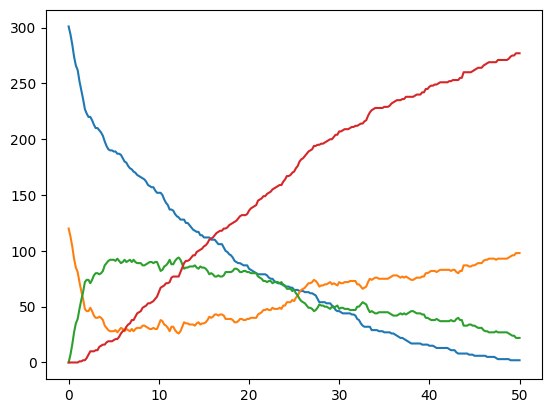

In [62]:
plt.plot(t_list, result)
plt.show()

## Compare

In [175]:
count = 1000

SSA_result = []
CLE_result = []

for i in range(count):
    t_list, result = SSA(y, k, v)
    SSA_result.append(result[len(t_list) - 1])
    t_list, result = CLE(y, k, v)
    CLE_result.append(result[len(t_list) - 1])

SSA_r = np.transpose(SSA_result)
print([np.mean(r_list) for r_list in SSA_r], 
      [np.var(r_list) for r_list in SSA_r])
CLE_r = np.transpose(CLE_result)
print([np.mean(r_list) for r_list in CLE_r], 
      [np.var(r_list) for r_list in CLE_r])

[1.475, 105.353, 14.647, 284.878] [1.505375, 15.700391, 15.700391000000002, 18.597116000000003]
[1.549, 105.214, 14.786, 284.665] [1.549599, 15.386203999999998, 15.386204000000001, 17.900775000000003]


# Tau-leaping Normal Dist Approximation

In [41]:
# Molecular-based Data
x = y * (nA * vol) // 1
c = np.array([k[0] / (nA * vol), k[1], k[2]])
print(x, c)

# Tau-Leaping with L Steps
t = 0
L = 250
t_max = 50
tau = t_max / L
t_list = np.arange(t, t_max + tau, tau)

result = [x]
for i in range(250): 
    a[0] = c[0] * x[0] * x[1]
    a[1] = c[1] * x[2]
    a[2] = c[2] * x[2]
    
    # Number of reactions during each step
    d = tau * a + np.sqrt(np.abs(tau * a)) * random.random()
    
    x = x + np.dot(d, v)
    result.append(x)
    
    # print(x, a, d)

[301. 120.   0.   0.] [0.0016603 0.0001    0.1      ]


In [42]:
result

[array([301., 120.,   0.,   0.]),
 array([286.33428969, 105.33428969,  14.66571031,   0.        ]),
 array([273.75486971,  93.48944493,  26.51055507,   0.73457522]),
 array([264.58863888,  85.02167431,  34.97832569,   1.43303543]),
 array([256.16218409,  77.59057451,  42.40942549,   2.42839042]),
 array([247.70846175,  70.65752239,  49.34247761,   3.94906064]),
 array([241.50282953,  65.60354745,  54.39645255,   5.10071792]),
 array([234.95662955,  60.73875145,  59.26124855,   6.7821219 ]),
 array([230.15820678,  57.15644013,  62.84355987,   7.99823334]),
 array([224.38187523,  53.40599023,  66.59400977,  10.02411501]),
 array([219.51777178,  50.39605161,  69.60394839,  11.87827983]),
 array([214.6689955 ,  47.67806042,  72.32193958,  14.00906492]),
 array([209.60212184,  45.16982894,  74.83017106,  16.5677071 ]),
 array([206.09973314,  43.4179966 ,  76.5820034 ,  18.31826347]),
 array([201.51038335,  41.54999379,  78.45000621,  21.03961043]),
 array([198.07405552,  40.18871894,  79.81

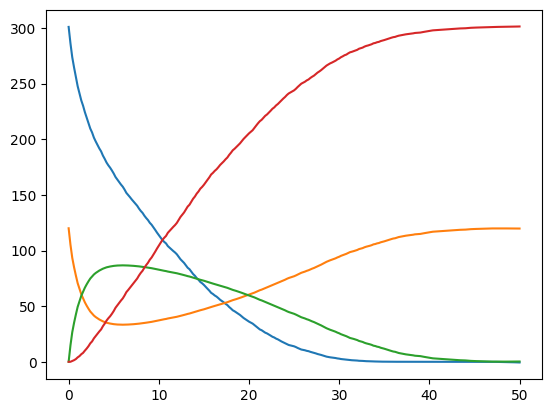

In [43]:
plt.plot(t_list, result)
plt.show()

## Reaction Rate Equation

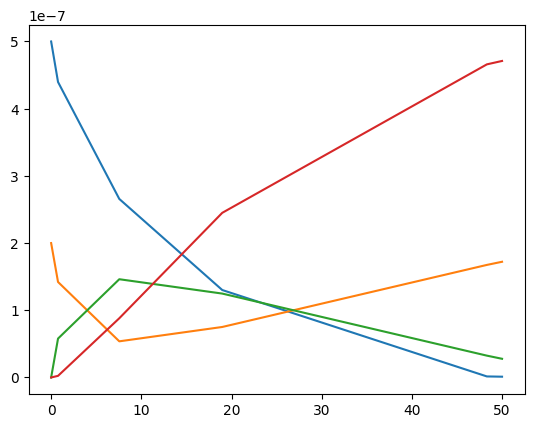

In [44]:
F = lambda t, s: np.array([
    - k[0] * s[0] * s[1] + k[1] * s[2], 
    - k[0] * s[0] * s[1] + (k[1] + k[2]) * s[2], 
    k[0] * s[0] * s[1] - (k[1] + k[2]) * s[2], 
    k[2] * s[2]
])

t_max = 50
t_eval = np.linspace(0, 50, 251)

sol = solve_ivp(F, [0, t_max], y, method = "DOP853")

plt.plot(sol.t, np.transpose(sol.y))
plt.show()